# Tutorial 3: Plotting with Matplotlib

> COM2004/COM3004

*Copyright &copy; 2022 University of Sheffield. All rights reserved*.

# What is Matplotlib?

* Matplotlib is a Python module for generating 2D and 3D plots
* it is based on the plotting tools from MATLAB
* it is extremely flexible - all aspects of plots can be controlled programmatically
* it can produce graphs, barcharts, scatter plots, contour and surface plots, etc
* it can produce very high quality output in numerous formats (png, pdf, svg, etc)

# Hello world

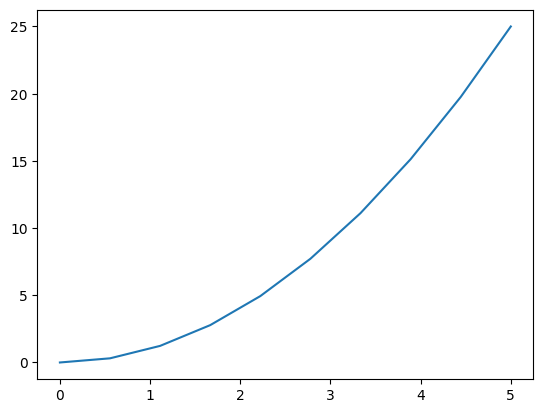

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 10)
y = x**2
plt.plot(x, y)

# A simple plot

Text(0.5, 1.0, 'Plot of y = 2^x')

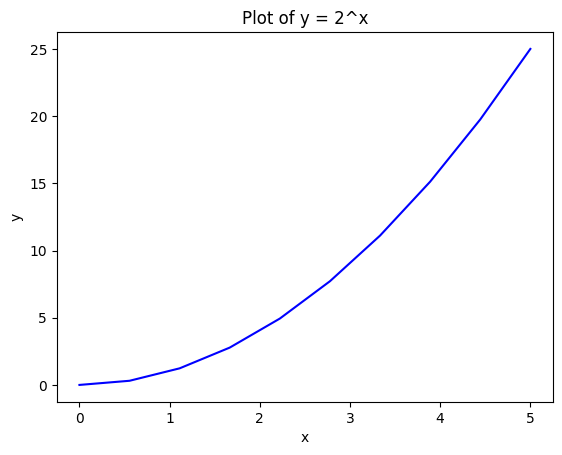

In [4]:
plt.figure()
plt.plot(x, y, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = 2^x")

# Object-oriented API

Text(0.5, 1.0, 'y = 2^x')

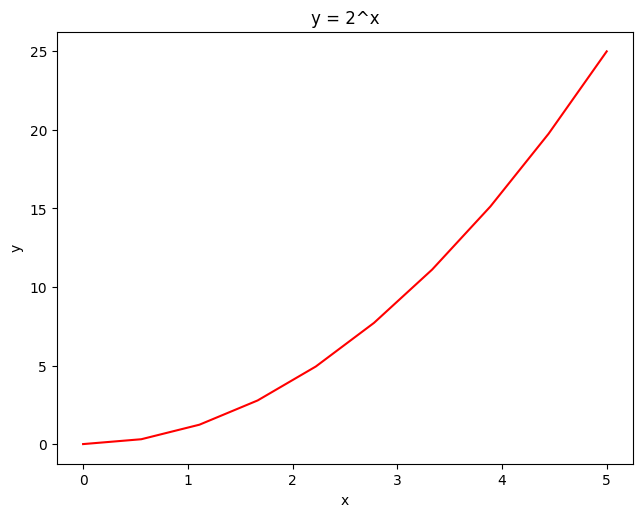

In [5]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.plot(x, y, "r-")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("y = 2^x")

# Multiple axes in a figure

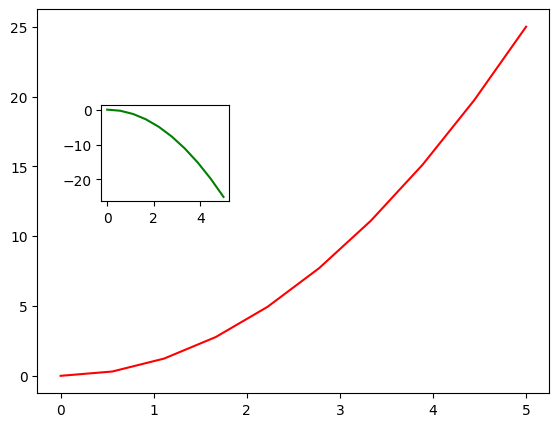

In [6]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.plot(x, y, "r-")
axes2 = fig.add_axes([0.2, 0.5, 0.2, 0.2])
axes2.plot(x, -y, "g-")

# Using the subplot layout manager

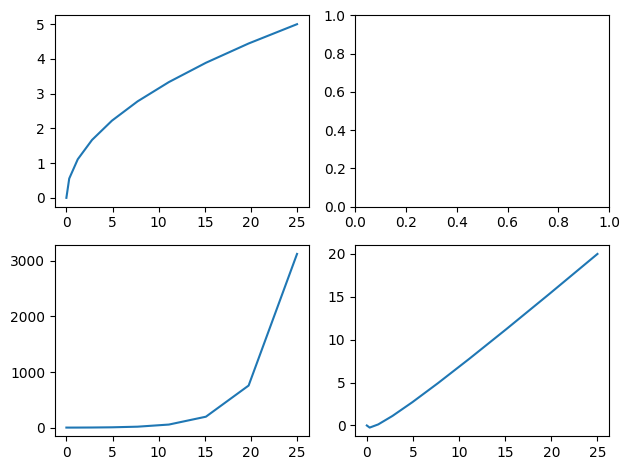

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].plot(y, x)
axes[1, 0].plot(y, x**x)
axes[1, 1].plot(y, x**2 - x)
fig.tight_layout()  # adjusts spacing to avoid plots overlapping labels

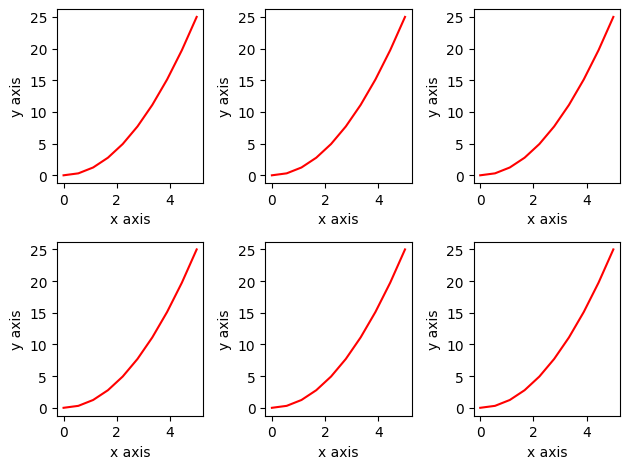

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3)
for ax in axes.reshape(-1):  # axes is returned a 2x4 numpy array; reshape into a vector
    ax.plot(x, y, "r")
    ax.set_ylabel("y axis")
    ax.set_xlabel("x axis")
fig.tight_layout()  # adjusts spacing to avoid plots overlapping labels

# Setting the figure size

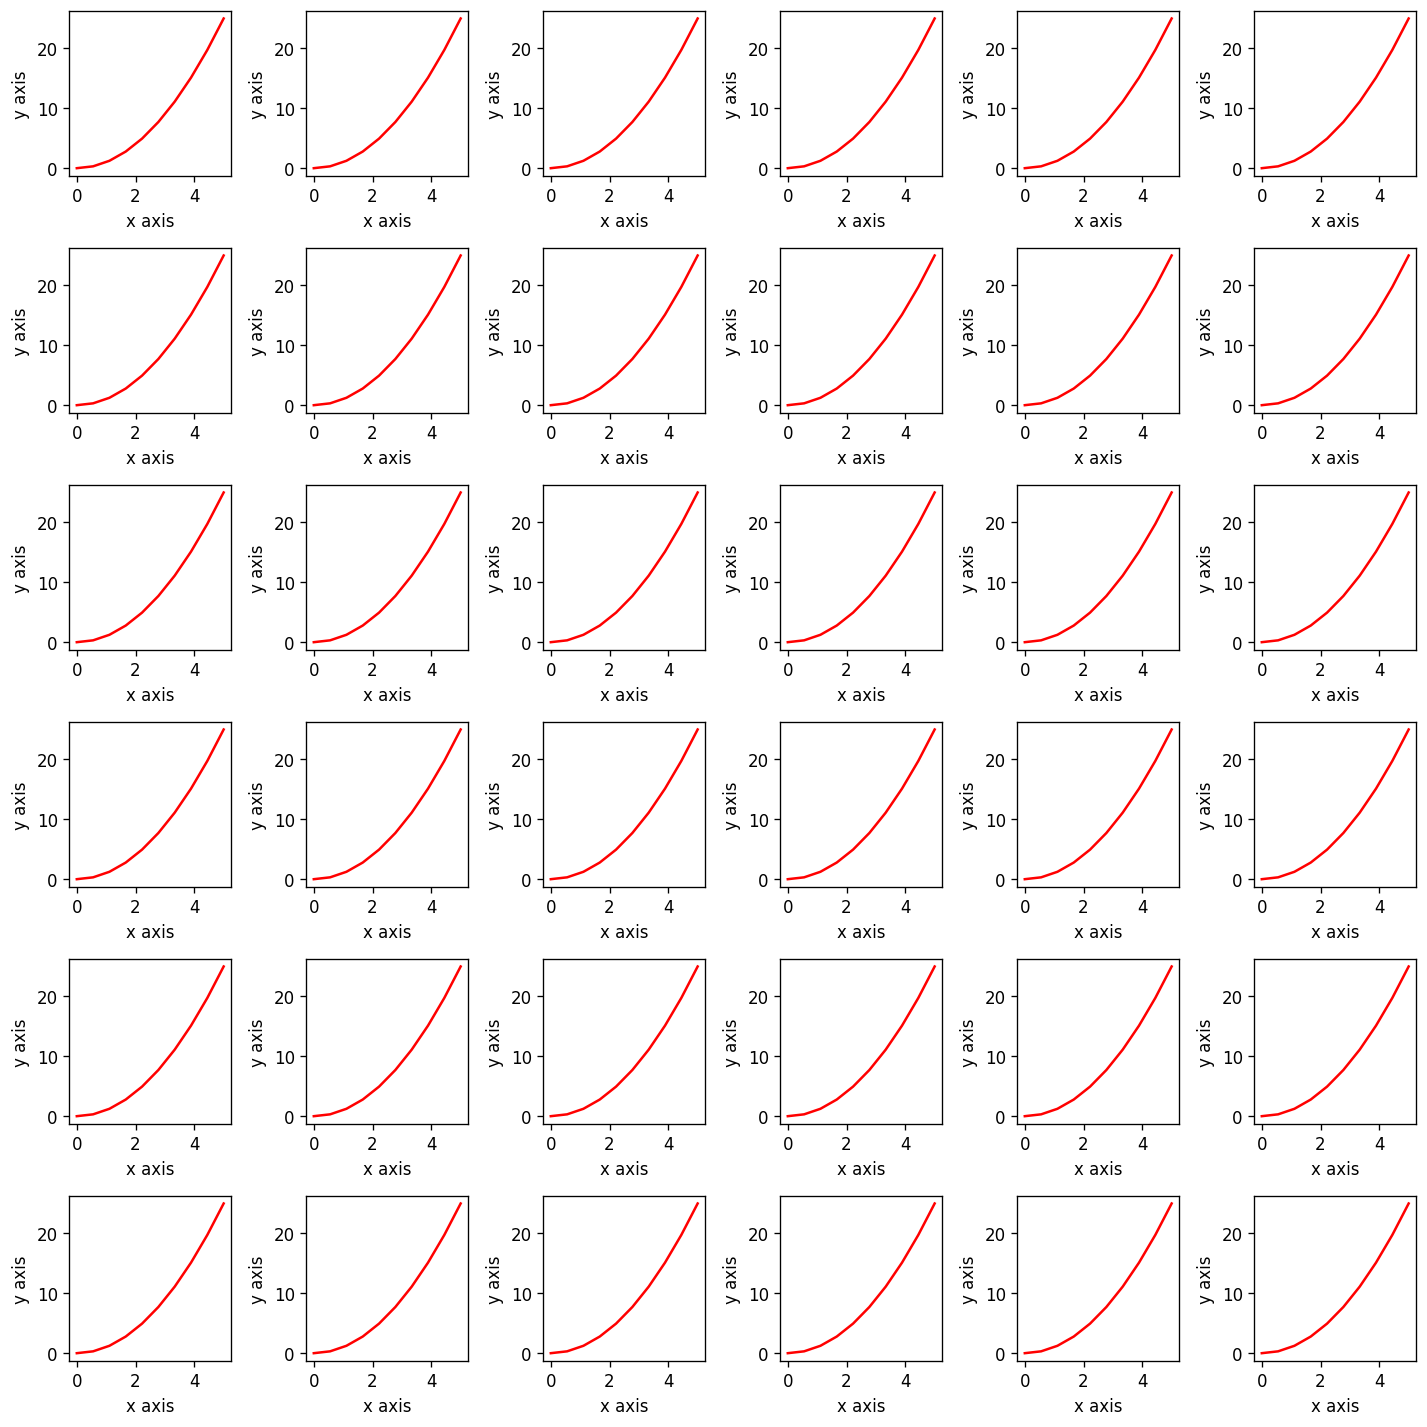

In [10]:
fig, axes = plt.subplots(nrows=6, ncols=6)
fig.set_size_inches((12, 12))  # defaults to 8 by 6
fig.set_dpi(120)  # defaults to 80
for ax in axes.reshape(-1):
    ax.plot(x, y, "r")
    ax.set_ylabel("y axis")
    ax.set_xlabel("x axis")
fig.tight_layout()

# Writing to file
Many formats available.

In [11]:
fig.savefig("myplot.png")

In [13]:
fig.savefig("myplot.pdf", dpi=200)  # setting 'dots per inch'

# Adding a legend

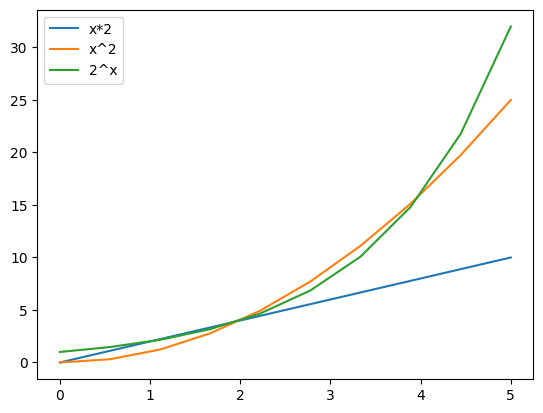

In [14]:
fig, ax = plt.subplots()  # by default returns a single axis
ax.plot(x, x * 2, label="x*2")
ax.plot(x, x * x, label="x^2")
ax.plot(x, 2**x, label="2^x")
ax.legend(loc=0)  # 1=UR, 2=UL, 3=LL, 4=LR, 0=matplotlib decides

Note, Matplotlib has chosen the line colours.

# Colors, linestyles

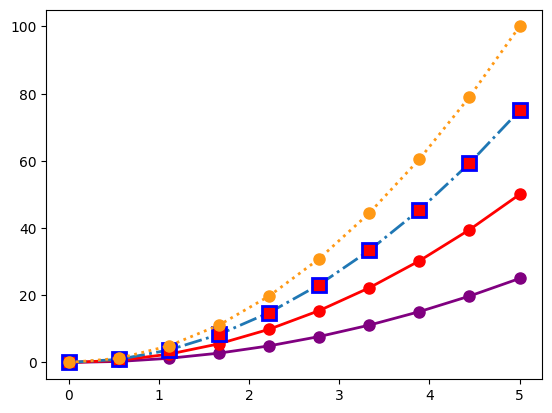

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y, color="purple", linewidth=2, linestyle="-", marker="o", markersize=8)
ax.plot(x, y * 2, lw=2, ls="-", marker="o", c="red", ms=8)
ax.plot(x, y * 3, lw=2, ls="-.", marker="s", ms=10, mfc="red", mec="blue", mew=2)
ax.plot(x, y * 4, lw=2, ls=":", marker="o", c="#ff9915", ms=8)

marker symbols can be '+', 's', '*', 'o' and many others

# Controlling the axes

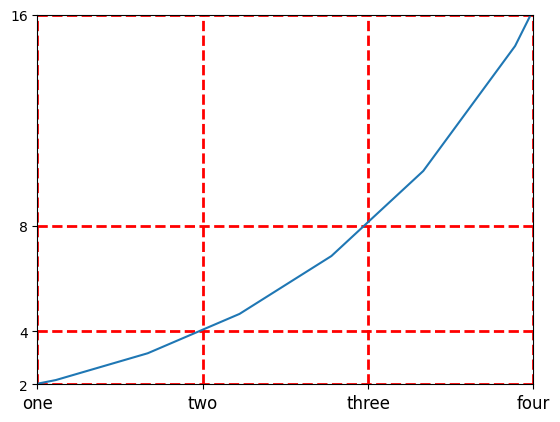

In [16]:
fig, ax = plt.subplots()
ax.plot(x, 2**x)
ax.set_xlim([1, 4])
ax.set_ylim([2, 16])
ax.set_yscale("linear")  # can be 'linear' or 'log'
ax.set_yticks([2, 4, 8, 16])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["one", "two", "three", "four"], fontsize=12)
ax.grid(color="red", linewidth=2, linestyle="dashed")

# Repositioning the spines

(-5.5, 5.5, -137.5, 137.5)

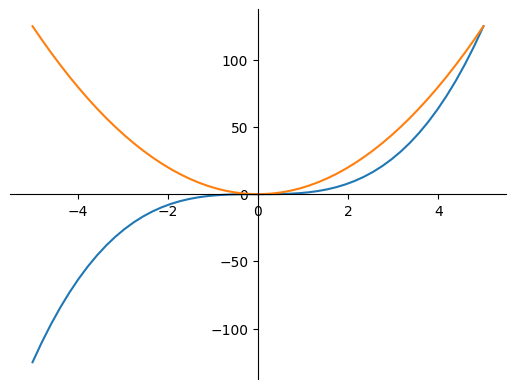

In [20]:
x = np.linspace(-5, 5, 50)
fig, ax = plt.subplots()
ax.plot(x, x**3)
ax.plot(x, x**2 * 5)
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.axis("tight")

# Adding text

Text(-2, 5, '$y=2x+1$')

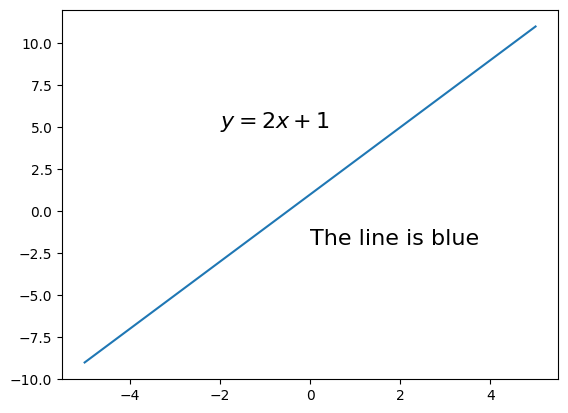

In [18]:
x = np.linspace(-5, 5, 10)
fig, ax = plt.subplots()
ax.plot(x, x * 2 + 1)
ax.axis("tight")
ax.text(0, -2, "The line is blue", fontsize=16)
ax.text(-2, 5, "$y=2x+1$", fontsize=16)

# Other plot types


<BarContainer object of 10 artists>

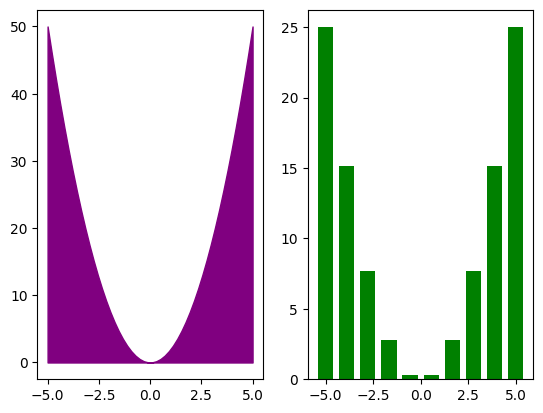

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2)

# Shade the region between two curves
x = np.linspace(-5, 5, 50)
ax[0].fill_between(x, 0, x**2 * 2, color="purple")
ax[0].axis("tight")

# Draw a bar chart (i.e. histogram)
y = np.linspace(-5, 5, 10)
ax[1].bar(y, y**2, color="green")

# Plotting data - histograms

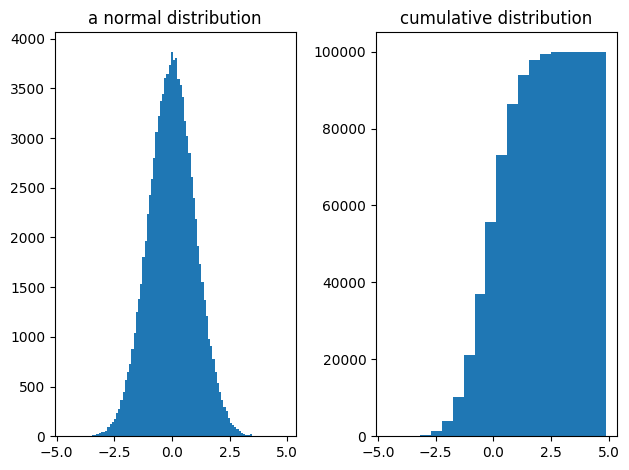

In [25]:
x = np.random.randn(100000)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(x, bins=100)
ax[0].set_title("a normal distribution")
ax[1].hist(x, cumulative=True, bins=20)
ax[1].set_title("cumulative distribution")
fig.tight_layout()

# Plotting data - scatter plots

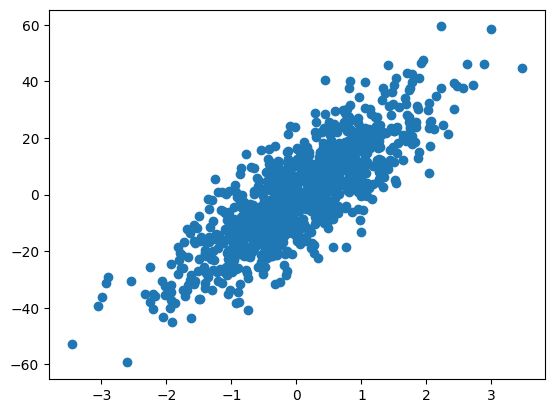

In [23]:
x = np.random.randn(1000)
y = 15 * x + 10 * np.random.randn(1000)
fig, ax = plt.subplots()
ax.scatter(x, y)

# Subplots
For more flexible layouts we can use `subplot2grid`

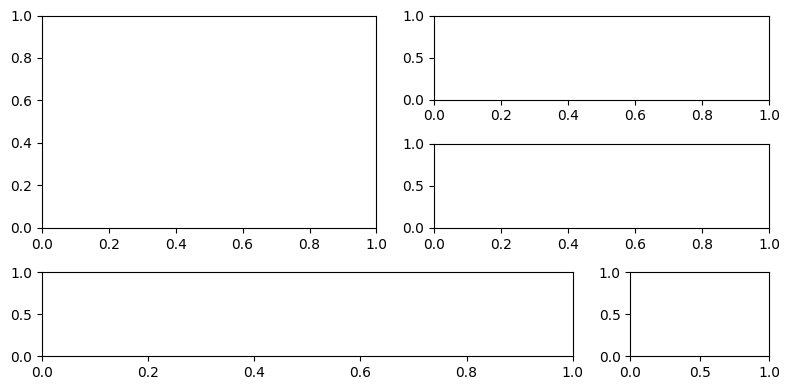

In [26]:
fig = plt.figure()
fig.set_size_inches((8, 4))
# subplot2grid((nrows, ncols), (row_pos, col_pos))
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((3, 4), (0, 2), colspan=2, rowspan=1)
ax3 = plt.subplot2grid((3, 4), (1, 2), colspan=2, rowspan=1)
ax4 = plt.subplot2grid((3, 4), (2, 0), colspan=3, rowspan=1)
ax5 = plt.subplot2grid((3, 4), (2, 3), colspan=1, rowspan=1)
fig.tight_layout()

# 3D plots
For example, plot 'z = cos(x) + sin(y)' as an intensity map

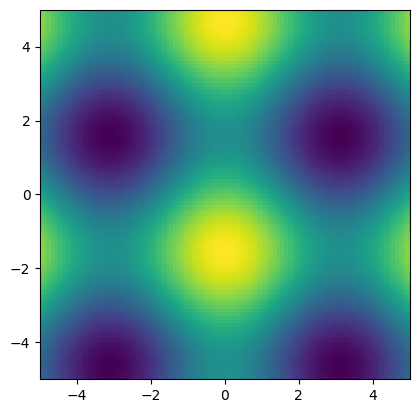

In [27]:
axis = np.linspace(-5, 5, 100)
(X, Y) = np.meshgrid(
    axis, axis
)  # outputs matrices X and Y storing grid of pixel coordinates
Z = np.cos(X) + np.sin(Y)  # perform some operation on the coordinate values
fig, ax = plt.subplots()
ax.imshow(Z, extent=[-5, 5, -5, 5])  # 'extent' used to set axes labels correctly

# Changing the colormap

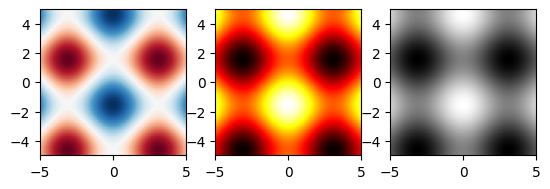

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(Z, cmap=plt.cm.RdBu, extent=[-5, 5, -5, 5])
ax[1].imshow(Z, cmap=plt.cm.hot, extent=[-5, 5, -5, 5])
ax[2].imshow(Z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])  # Note US spelling of 'grey'

In [29]:
dir(plt.cm)  # see the full list of predefined colour maps

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_LUTSIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '

# Generating a contour plot

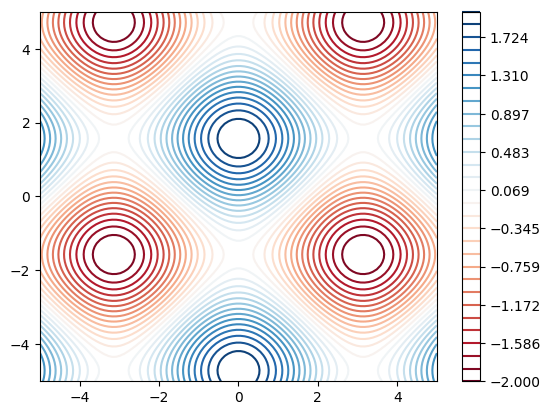

In [31]:
fig, ax = plt.subplots()
levels = np.linspace(-2, 2, 30)
im = ax.contour(Z, cmap=plt.cm.RdBu, extent=[-5, 5, -5, 5], levels=levels)
fig.colorbar(im, ax=ax)
fig.savefig("myplot.pdf")

# 3D figures

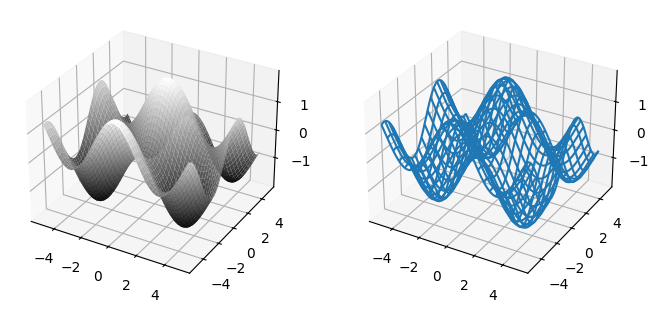

In [32]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")  # generate an Axes3D
im = ax1.plot_surface(X, Y, Z, cmap=plt.cm.gray)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")  # generate an Axes3D
im = ax2.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

In [ ]:
# help(Axes3D)

# Projections

(-3.0, 2.0)

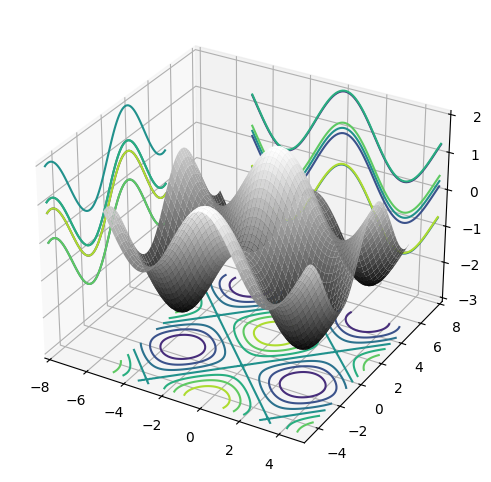

In [34]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")  # generate an Axes3D
ax.plot_surface(X, Y, Z, cmap=plt.cm.gray)
ax.contour(X, Y, Z, zdir="z", offset=-3)
ax.contour(X, Y, Z, zdir="x", offset=-8)
ax.contour(X, Y, Z, zdir="y", offset=+8)
ax.set_xlim3d(-8, 5)
ax.set_ylim3d(-5, 8)
ax.set_zlim3d(-3, 2)

# Generating Animations

You may need to install the ffmpeg library through conda for this section using `conda install -c conda-forge ffmpeg`. Otherwise try setting the output to .gif instead.

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

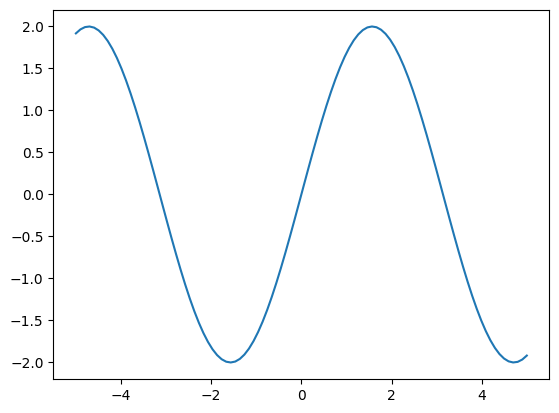

In [36]:
from matplotlib import animation

fig, ax = plt.subplots()


def update(frame_counter):
    plt.cla()
    x = np.linspace(-5, 5, 100)
    y = np.sin(x * (1.0 + frame_counter / 10.0)) + np.sin(x)
    ax.plot(x, y)


anim = animation.FuncAnimation(fig, update, frames=200)
anim.save("animation.mp4", fps=20)

# Viewing the animation

In [37]:
import base64

from IPython.display import HTML

video = open("animation.mp4", "rb").read()
encoded = base64.b64encode(video)
HTML(
    data="""<video alt="test" controls>
             <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>""".format(
        encoded.decode("ascii")
    )
)

FileNotFoundError: [Errno 2] No such file or directory: 'animation.mp4'

# Summary

* We have seen examples of some of the most common plot types
* We have seen how plots can be built using an object-based API
* Many, many features have not been covered, but the library is very well documented...
* For documentation and further examples see [http://matplotlib.org](http://matplotlib.org)